In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from scipy import stats

In [3]:
# Load the data
df = pd.read_csv('NCRB_Table_1C.2 (1).csv')


In [4]:
# Data Cleaning and Preprocessing
df = df.drop(columns=['Sl. No.', 'Category'])
df = df.rename(columns={'State/UT': 'State'})
df = df[df['State'] != 'Total State (S)']
df = df[df['State'] != 'Total UT (S)']
df = df[df['State'] != 'Total All India']

In [5]:
# Convert numeric columns to float
numeric_columns = df.columns[1:]
df[numeric_columns] = df[numeric_columns].astype(float)

In [6]:
# Calculate crime rate per 100,000 population (assuming population data is available)
# For this example, we'll use a hypothetical population for each state
# In a real scenario, you would need to import actual population data
df['Population'] = np.random.randint(1000000, 100000000, size=len(df))
df['Crime Rate'] = df['Total Violent Crimes (Cols.3 to 17)'] / df['Population'] * 100000

1. Crime Rate Analysis

Top 5 States with Highest Crime Rates:
             State  Crime Rate
18          Odisha  308.996167
27     West Bengal  132.038037
12  Madhya Pradesh  106.745444
6          Gujarat   90.196054
24         Tripura   76.632379

Top 5 States with Lowest Crime Rates:
                                       State  Crime Rate
37                               Lakshadweep    0.012008
36                                    Ladakh    0.040369
31               Andaman and Nicobar Islands    0.108857
21                                    Sikkim    0.180158
33  Dadra and Nagar Haveli and Daman and Diu    0.307732


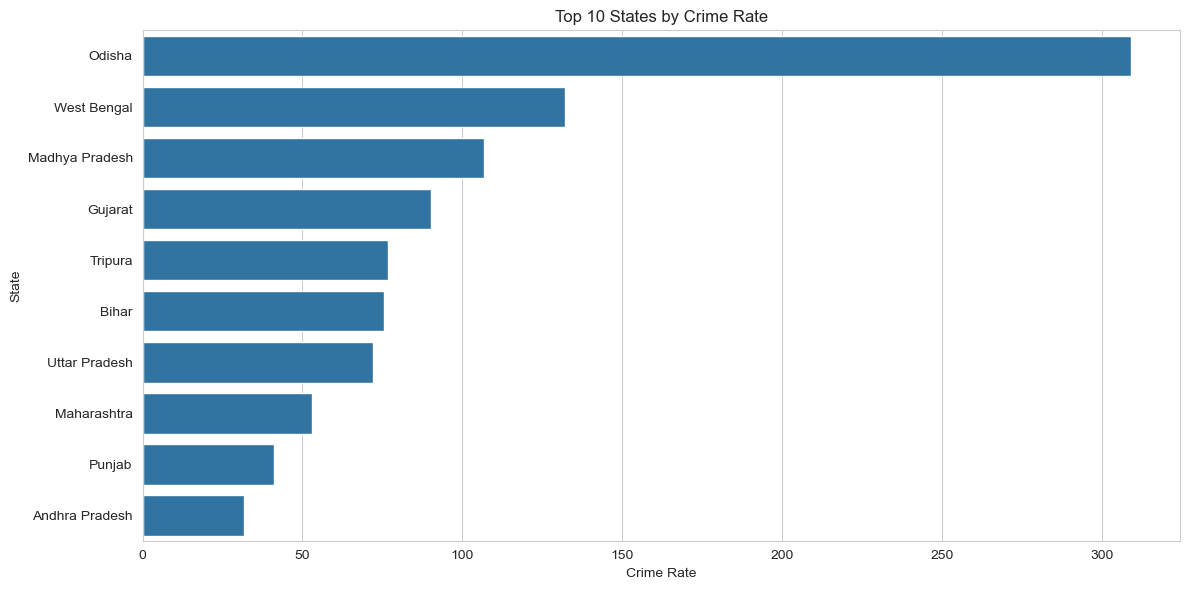

In [7]:
# 1. Crime Rate by State/Region
def analyze_crime_rates():
    print("1. Crime Rate Analysis")
    print("\nTop 5 States with Highest Crime Rates:")
    print(df.sort_values('Crime Rate', ascending=False)[['State', 'Crime Rate']].head())
    
    print("\nTop 5 States with Lowest Crime Rates:")
    print(df.sort_values('Crime Rate')[['State', 'Crime Rate']].head())
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Crime Rate', y='State', data=df.sort_values('Crime Rate', ascending=False).head(10))
    plt.title('Top 10 States by Crime Rate')
    plt.tight_layout()
    plt.show()

analyze_crime_rates()


2. Violent Crime Trend Analysis

Most Common Violent Crimes in India:
Total Violent Crimes (Cols.3 to 17)              434108.0
Grievous Hurt (Sec 325, 326, 326A & 326B IPC)    108884.0
Kidnapping and Abduction (Sec 363-369 IPC)       107588.0
Attempt to Commit Murder (Sec.307 IPC)            57256.0
Rioting (Sec 147-151 & 153A IPC)                  37816.0
dtype: float64


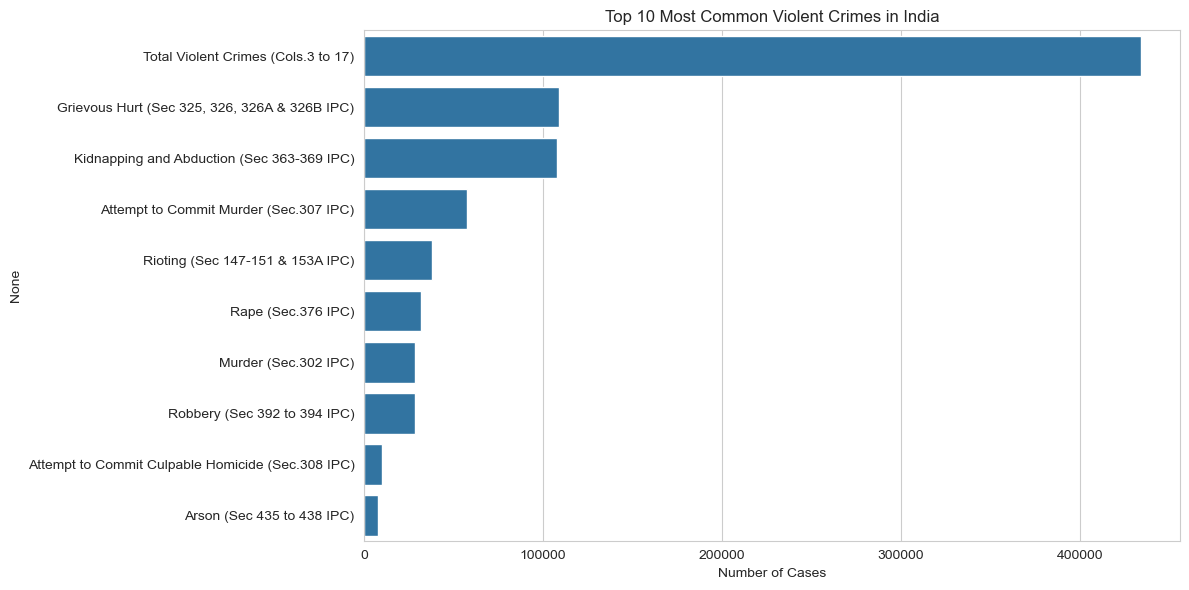


Top 5 States with Highest Rape (Sec.376 IPC):
             State  Rape (Sec.376 IPC)
20       Rajasthan              5399.0
25   Uttar Pradesh              3690.0
12  Madhya Pradesh              3029.0
13     Maharashtra              2904.0
7          Haryana              1787.0

Top 5 States with Highest Dowry Deaths (Sec.304B IPC):
             State  Dowry Deaths (Sec.304B IPC)
25   Uttar Pradesh                       2138.0
3            Bihar                       1057.0
12  Madhya Pradesh                        518.0
20       Rajasthan                        451.0
27     West Bengal                        406.0

Top 5 States with Highest Murder (Sec.302 IPC):
             State  Murder (Sec.302 IPC)
25   Uttar Pradesh                3491.0
3            Bihar                2930.0
13     Maharashtra                2295.0
12  Madhya Pradesh                1978.0
20       Rajasthan                1834.0


In [8]:
# 2. Violent Crime Trend Analysis
def analyze_violent_crime_trends():
    print("\n2. Violent Crime Trend Analysis")
    
    crime_types = df.columns[1:-2]  # Exclude 'State', 'Population', and 'Crime Rate'
    total_crimes = df[crime_types].sum().sort_values(ascending=False)
    
    print("\nMost Common Violent Crimes in India:")
    print(total_crimes.head())
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x=total_crimes.head(10).values, y=total_crimes.head(10).index)
    plt.title('Top 10 Most Common Violent Crimes in India')
    plt.xlabel('Number of Cases')
    plt.tight_layout()
    plt.show()
    
    # Analysis of specific crimes across regions
    specific_crimes = ['Rape (Sec.376 IPC)', 'Dowry Deaths (Sec.304B IPC)', 'Murder (Sec.302 IPC)']
    for crime in specific_crimes:
        print(f"\nTop 5 States with Highest {crime}:")
        print(df.sort_values(crime, ascending=False)[['State', crime]].head())

analyze_violent_crime_trends()


3. Correlation Analysis of Crimes


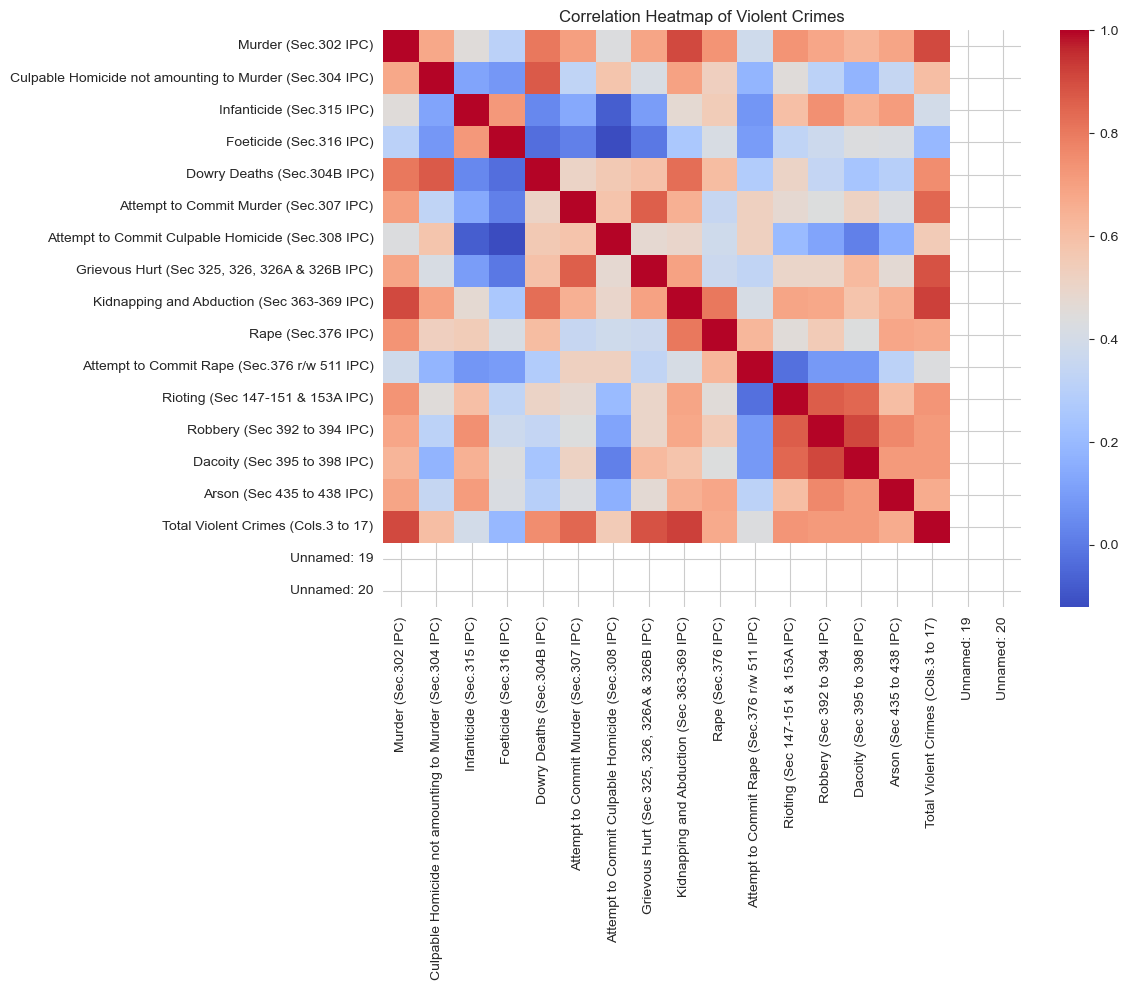


Highest Correlations:
Kidnapping and Abduction (Sec 363-369 IPC)     Total Violent Crimes (Cols.3 to 17)              0.924062
Total Violent Crimes (Cols.3 to 17)            Kidnapping and Abduction (Sec 363-369 IPC)       0.924062
Robbery (Sec 392 to 394 IPC)                   Dacoity (Sec 395 to 398 IPC)                     0.910963
Dacoity (Sec 395 to 398 IPC)                   Robbery (Sec 392 to 394 IPC)                     0.910963
Murder (Sec.302 IPC)                           Total Violent Crimes (Cols.3 to 17)              0.908049
Total Violent Crimes (Cols.3 to 17)            Murder (Sec.302 IPC)                             0.908049
Murder (Sec.302 IPC)                           Kidnapping and Abduction (Sec 363-369 IPC)       0.905920
Kidnapping and Abduction (Sec 363-369 IPC)     Murder (Sec.302 IPC)                             0.905920
Total Violent Crimes (Cols.3 to 17)            Grievous Hurt (Sec 325, 326, 326A & 326B IPC)    0.887525
Grievous Hurt (Sec 325, 326, 326

In [9]:
# 3. Correlation Analysis of Crimes
def correlation_analysis():
    print("\n3. Correlation Analysis of Crimes")
    
    corr_matrix = df[df.columns[1:-2]].corr()
    
    # Visualization
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Heatmap of Violent Crimes')
    plt.tight_layout()
    plt.show()
    
    print("\nHighest Correlations:")
    corr_unstack = corr_matrix.unstack()
    print(corr_unstack[corr_unstack < 1].sort_values(ascending=False).head(10))
    
    # Analysis of attempts vs. successful crimes
    attempt_crimes = ['Attempt to Commit Murder (Sec.307 IPC)', 'Attempt to Commit Rape (Sec.376 r/w 511 IPC)']
    actual_crimes = ['Murder (Sec.302 IPC)', 'Rape (Sec.376 IPC)']
    
    for attempt, actual in zip(attempt_crimes, actual_crimes):
        correlation = df[attempt].corr(df[actual])
        print(f"\nCorrelation between {attempt} and {actual}: {correlation:.2f}")

correlation_analysis()


4. Impact of Gender-Related Crimes

Top 5 States with Highest Rape (Sec.376 IPC):
             State  Rape (Sec.376 IPC)
20       Rajasthan              5399.0
25   Uttar Pradesh              3690.0
12  Madhya Pradesh              3029.0
13     Maharashtra              2904.0
7          Haryana              1787.0

Top 5 States with Highest Dowry Deaths (Sec.304B IPC):
             State  Dowry Deaths (Sec.304B IPC)
25   Uttar Pradesh                       2138.0
3            Bihar                       1057.0
12  Madhya Pradesh                        518.0
20       Rajasthan                        451.0
27     West Bengal                        406.0

Top 5 States with Highest Infanticide (Sec.315 IPC):
             State  Infanticide (Sec.315 IPC)
13     Maharashtra                       25.0
12  Madhya Pradesh                       11.0
22      Tamil Nadu                        7.0
20       Rajasthan                        7.0
4     Chhattisgarh                        6.0

Correlat

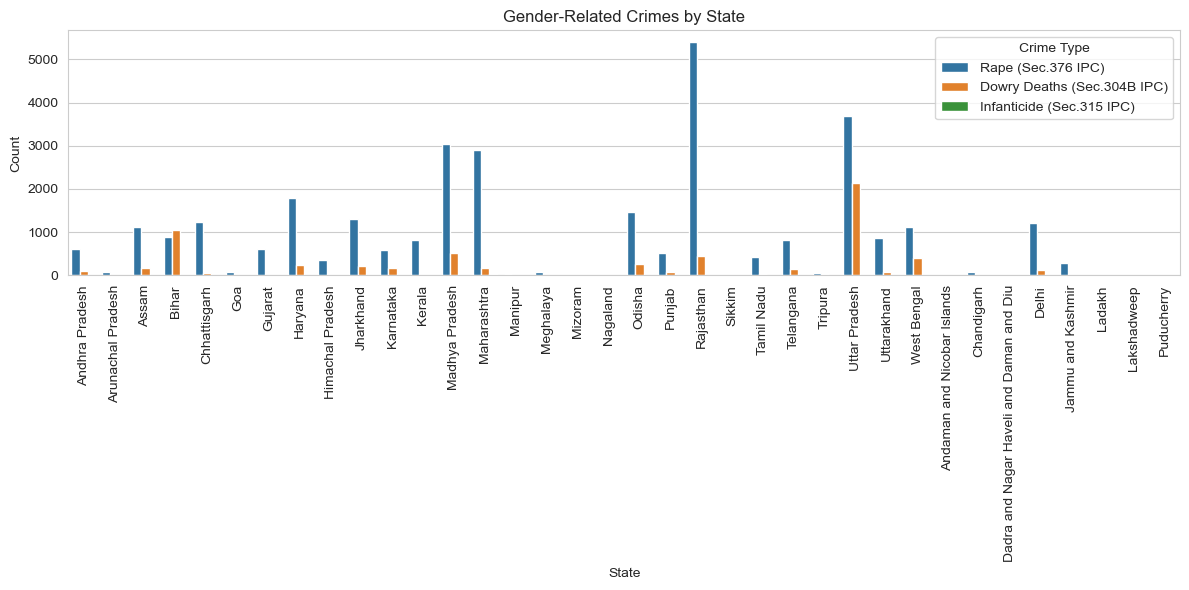

In [10]:
# 4. Impact of Gender-Related Crimes
def analyze_gender_related_crimes():
    print("\n4. Impact of Gender-Related Crimes")
    
    gender_crimes = ['Rape (Sec.376 IPC)', 'Dowry Deaths (Sec.304B IPC)', 'Infanticide (Sec.315 IPC)']
    
    for crime in gender_crimes:
        print(f"\nTop 5 States with Highest {crime}:")
        print(df.sort_values(crime, ascending=False)[['State', crime]].head())
    
    # Correlation with overall crime rate
    for crime in gender_crimes:
        correlation = df[crime].corr(df['Crime Rate'])
        print(f"\nCorrelation between {crime} and overall Crime Rate: {correlation:.2f}")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    df_melted = df.melt(id_vars='State', value_vars=gender_crimes, var_name='Crime Type', value_name='Count')
    sns.barplot(x='State', y='Count', hue='Crime Type', data=df_melted)
    plt.xticks(rotation=90)
    plt.title('Gender-Related Crimes by State')
    plt.tight_layout()
    plt.show()

analyze_gender_related_crimes()


5. Crime Prevention Prioritization

Top 3 States to Prioritize for Murder (Sec.302 IPC):
            State  Murder (Sec.302 IPC)
25  Uttar Pradesh                3491.0
3           Bihar                2930.0
13    Maharashtra                2295.0

Top 3 States to Prioritize for Culpable Homicide not amounting to Murder (Sec.304 IPC):
            State  Culpable Homicide not amounting to Murder (Sec.304 IPC)
25  Uttar Pradesh                                             1240.0      
19         Punjab                                              262.0      
23      Telangana                                              256.0      

Top 3 States to Prioritize for Infanticide (Sec.315 IPC):
             State  Infanticide (Sec.315 IPC)
13     Maharashtra                       25.0
12  Madhya Pradesh                       11.0
22      Tamil Nadu                        7.0

Top 3 States to Prioritize for Foeticide (Sec.316 IPC):
           State  Foeticide (Sec.316 IPC)
6        Gujarat   

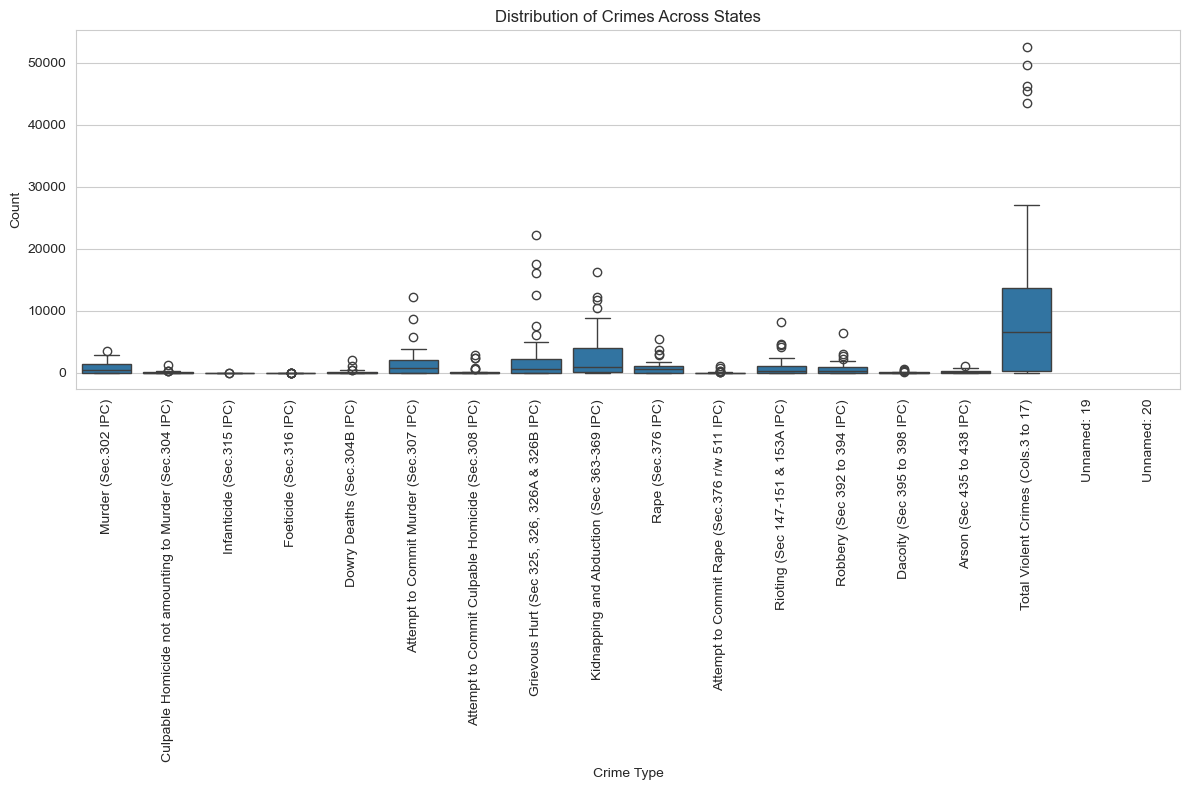

In [11]:
# 5. Crime Prevention Prioritization
def crime_prevention_prioritization():
    print("\n5. Crime Prevention Prioritization")
    
    crime_types = df.columns[1:-2]
    
    for crime in crime_types:
        print(f"\nTop 3 States to Prioritize for {crime}:")
        print(df.sort_values(crime, ascending=False)[['State', crime]].head(3))
    
    # Visualization of crime distribution
    plt.figure(figsize=(12, 8))
    df_melted = df.melt(id_vars='State', value_vars=crime_types, var_name='Crime Type', value_name='Count')
    sns.boxplot(x='Crime Type', y='Count', data=df_melted)
    plt.xticks(rotation=90)
    plt.title('Distribution of Crimes Across States')
    plt.tight_layout()
    plt.show()

crime_prevention_prioritization()


6. Crime Severity and Category Analysis

Proportion of Each Crime Type in Total Violent Crimes:
Population                                                 99.959558
Total Violent Crimes (Cols.3 to 17)                         0.020193
Grievous Hurt (Sec 325, 326, 326A & 326B IPC)               0.005065
Kidnapping and Abduction (Sec 363-369 IPC)                  0.005005
Attempt to Commit Murder (Sec.307 IPC)                      0.002663
Rioting (Sec 147-151 & 153A IPC)                            0.001759
Rape (Sec.376 IPC)                                          0.001466
Murder (Sec.302 IPC)                                        0.001327
Robbery (Sec 392 to 394 IPC)                                0.001319
Attempt to Commit Culpable Homicide (Sec.308 IPC)           0.000472
Arson (Sec 435 to 438 IPC)                                  0.000363
Dowry Deaths (Sec.304B IPC)                                 0.000300
Culpable Homicide not amounting to Murder (Sec.304 IPC)     0.000168
Attemp

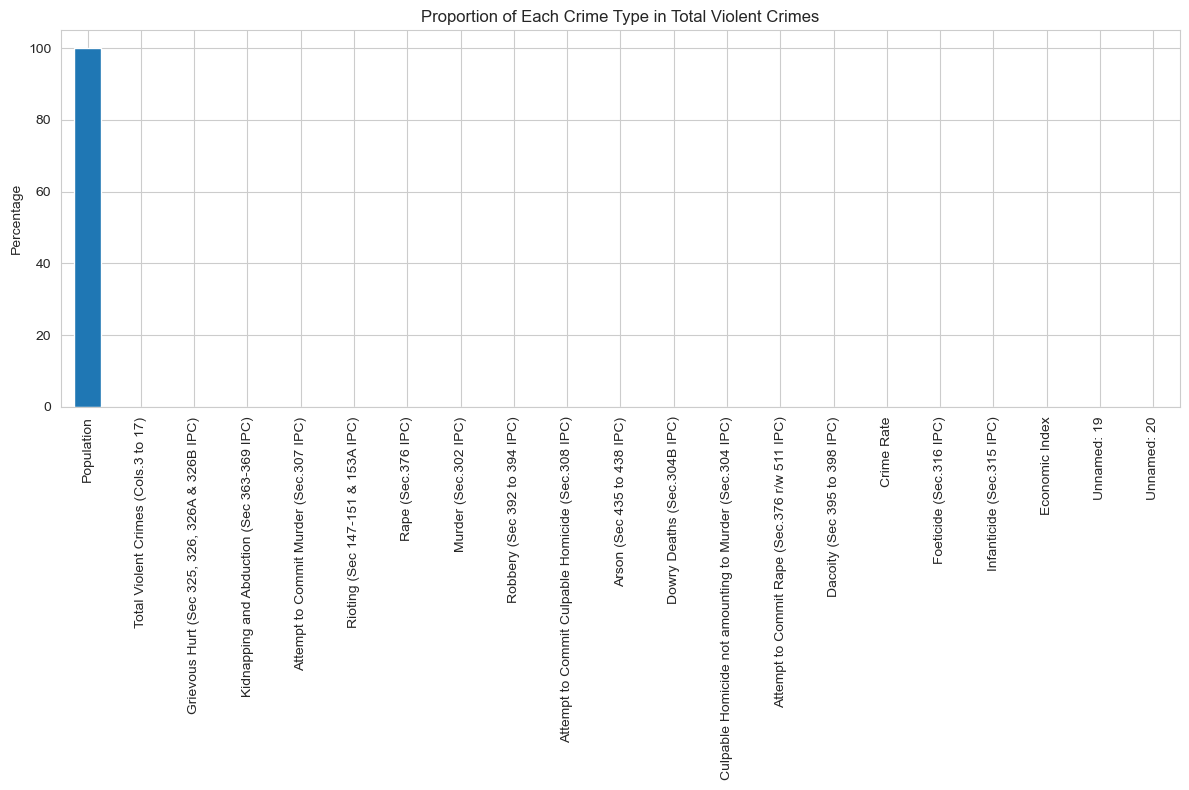


Top Contributing Crime Type for Each State:
Andhra Pradesh: Population
Arunachal Pradesh: Population
Assam: Population
Bihar: Population
Chhattisgarh: Population
Goa: Population
Gujarat: Population
Haryana: Population
Himachal Pradesh: Population
Jharkhand: Population
Karnataka: Population
Kerala: Population
Madhya Pradesh: Population
Maharashtra: Population
Manipur: Population
Meghalaya: Population
Mizoram: Population
Nagaland: Population
Odisha: Population
Punjab: Population
Rajasthan: Population
Sikkim: Population
Tamil Nadu: Population
Telangana: Population
Tripura: Population
Uttar Pradesh: Population
Uttarakhand: Population
West Bengal: Population
nan: Population
nan: Population
Andaman and Nicobar Islands: Population
Chandigarh: Population
Dadra and Nagar Haveli and Daman and Diu: Population
Delhi: Population
Jammu and Kashmir: Population
Ladakh: Population
Lakshadweep: Population
Puducherry: Population
nan: Population


In [18]:
# 6. Crime Severity and Category Analysis
def crime_severity_analysis():
    print("\n6. Crime Severity and Category Analysis")
    
    crime_types = df.columns[1:-2]
    total_crimes = df[crime_types].sum()
    crime_proportions = total_crimes / total_crimes.sum() * 100
    
    print("\nProportion of Each Crime Type in Total Violent Crimes:")
    print(crime_proportions.sort_values(ascending=False))
    
    # Visualization
    plt.figure(figsize=(12, 8))
    crime_proportions.sort_values(ascending=False).plot(kind='bar')
    plt.title('Proportion of Each Crime Type in Total Violent Crimes')
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Regional analysis
    print("\nTop Contributing Crime Type for Each State:")
    for _, row in df.iterrows():
        state = row['State']
        top_crime = row[crime_types].idxmax()
        print(f"{state}: {top_crime}")

crime_severity_analysis()


7. Cultural and Economic Influences on Crime (Hypothetical Analysis)

Hypothetical correlation between Economic Index and Crime Rate: -0.14
Hypothetical correlation between Cultural Index and Crime Rate: 0.02


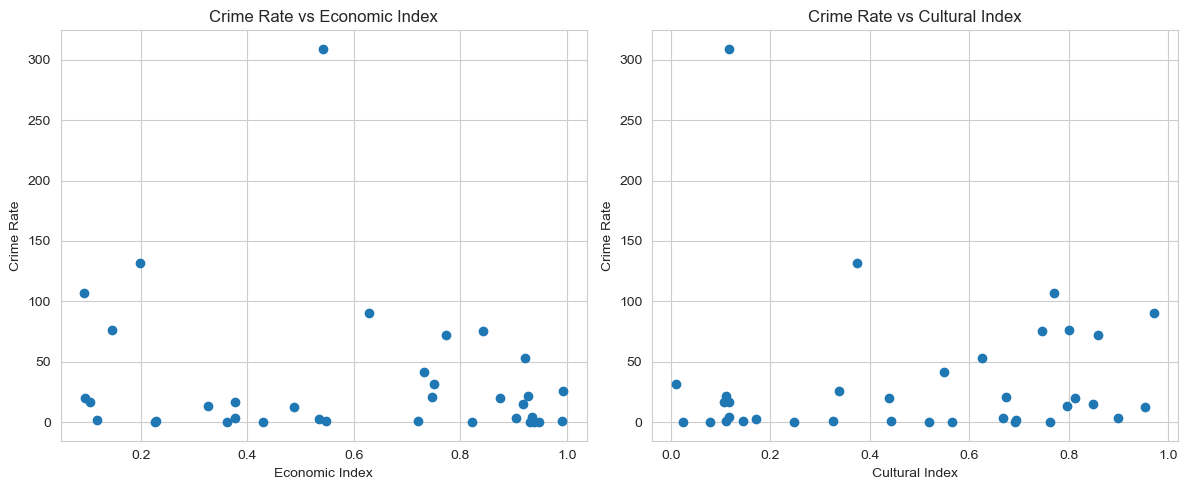

In [13]:
# 7. Cultural and Economic Influences on Crime (Hypothetical Analysis)
def cultural_economic_analysis():
    print("\n7. Cultural and Economic Influences on Crime (Hypothetical Analysis)")
    
    # This analysis would require additional socio-economic data
    # For demonstration, we'll use hypothetical data
    
    df['Economic Index'] = np.random.rand(len(df))  # Hypothetical economic index
    df['Cultural Index'] = np.random.rand(len(df))  # Hypothetical cultural index
    
    economic_corr = df['Economic Index'].corr(df['Crime Rate'])
    cultural_corr = df['Cultural Index'].corr(df['Crime Rate'])
    
    print(f"\nHypothetical correlation between Economic Index and Crime Rate: {economic_corr:.2f}")
    print(f"Hypothetical correlation between Cultural Index and Crime Rate: {cultural_corr:.2f}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(df['Economic Index'], df['Crime Rate'])
    plt.title('Crime Rate vs Economic Index')
    plt.xlabel('Economic Index')
    plt.ylabel('Crime Rate')
    
    plt.subplot(1, 2, 2)
    plt.scatter(df['Cultural Index'], df['Crime Rate'])
    plt.title('Crime Rate vs Cultural Index')
    plt.xlabel('Cultural Index')
    plt.ylabel('Crime Rate')
    
    plt.tight_layout()
    plt.show()

cultural_economic_analysis()

In [14]:
# 8. State-Specific Crime Control Recommendations
def crime_control_recommendations():
    print("\n8. State-Specific Crime Control Recommendations")
    
    # Example: Focus on women's safety in states with high rape and dowry death rates
    df['Women Safety Index'] = df['Rape (Sec.376 IPC)'] + df['Dowry Deaths (Sec.304B IPC)']
    
    print("\nStates Needing Focus on Women's Safety:")
    print(df.sort_values('Women Safety Index', ascending=False)[['State', 'Women Safety Index']].head())
    
    # Other recommendations based on crime rates
    high_crime_states = df.sort_values('Crime Rate', ascending=False).head(5)
    
    for _, state in high_crime_states.iterrows():
        print(f"\nRecommendations for {state['State']}:")
        top_crimes = state.sort_values(ascending=False).head(3)
        for crime, value in top_crimes.items():
            if crime not in ['State', 'Population', 'Crime Rate']:
                print(f"- Focus on reducing {crime}: {value:.0f} cases")

crime_control_recommendations()


8. State-Specific Crime Control Recommendations

States Needing Focus on Women's Safety:
             State  Women Safety Index
20       Rajasthan              5850.0
25   Uttar Pradesh              5828.0
12  Madhya Pradesh              3547.0
13     Maharashtra              3084.0
7          Haryana              2021.0

Recommendations for Odisha:


TypeError: '<' not supported between instances of 'str' and 'float'

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load India shapefile
india_map = gpd.read_file('Indian_states.shp')

# Assuming you have a DataFrame 'df' with 'State' and 'Crime Rate' columns
# Replace 'df' and 'State', 'Crime Rate' with your actual DataFrame and column names
df = pd.DataFrame({'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
                   'Crime Rate': [12345, 6789, 54321, 23456, 78901, 34567, 89012, 45678, 90123, 56789, 123456, 789012, 345678, 901234, 567890, 1234567, 7890123, 4567890, 2345678, 8901234, 5678901, 12345678, 9012345, 6789012, 3456789, 23456789, 123456789, 987654321]})

# Merge crime data with map data
merged_data = india_map.merge(df, how='left', left_on='NAME_1', right_on='State')

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data = india_map.merge(df, how='left', left_on='NAME_1', right_on='NAME_1')

# Customize the map
ax.axis('off')
ax.set_title('Crime Rate Heatmap of India', fontdict={'fontsize': '25', 'fontweight': '3'})

# Add annotations
for idx, row in merged_data.iterrows():
    ax.annotate(text=row['State'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                xytext=(3, 3), textcoords="offset points", fontsize=8)

plt.tight_layout()
plt.show()

KeyError: 'NAME_1'